In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

We first import an example dataset from the sklearn library :

In [2]:
import sklearn.datasets
iris = sklearn.datasets.load_iris()

We then prepate the two variables X and y

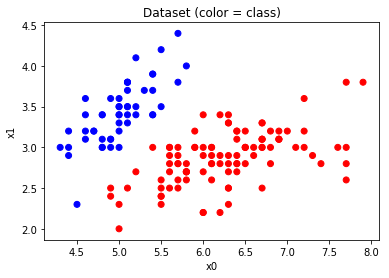

In [3]:
X = iris.data[:, :2]
y = np.sign(iris.target)

def plot_data(X, y, **kwargs):
    """ Util function to plot quick graph with title, axis labels and color coding """
    plt.scatter(X[:, 0], X[:, 1], color=np.array([[1. * x, 0, 1. * (1-x)] for x in y]))
    for k, v in kwargs.items(): getattr(plt, k)(v)
    plt.show()
    
plot_data(X, y, title='Dataset (color = class)', xlabel='x0', ylabel='x1')

We define the sigmoid function used by logistic regression:

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

We also define a loss function:

In [5]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

Then we put together our general logistic regression algorithm

In [6]:
weights = np.zeros(X.shape[1])

ITERATIONS = 500
LRATE = 0.03

for i in range(ITERATIONS):
    z = np.dot(X, weights)
    h = sigmoid(z)
    gradient = np.dot(X.T, (h - y)) / y.size
    weights -= LRATE * gradient
    
    print(f'loss: {loss(h, y)}')

loss: 0.6931471805599454
loss: 0.6498036041263174
loss: 0.6292846354864227
loss: 0.6188859046559444
loss: 0.6130813853663795
loss: 0.6094296168624841
loss: 0.6068161676026913
loss: 0.6047160447150527
loss: 0.6028754454263378
loss: 0.6011691925627726
loss: 0.5995346113444694
loss: 0.5979399665699638
loss: 0.5963690528585162
loss: 0.5948135404935346
loss: 0.5932691240490672
loss: 0.5917335657790841
loss: 0.5902056945451973
loss: 0.5886848909742068
loss: 0.5871708216824746
loss: 0.5856633017052697
loss: 0.5841622231532265
loss: 0.5826675181676838
loss: 0.5811791396716439
loss: 0.5796970513652403
loss: 0.5782212225272583
loss: 0.5767516253161409
loss: 0.5752882333708644
loss: 0.5738310210875203
loss: 0.57237996324682
loss: 0.5709350348235683
loss: 0.5694962108902705
loss: 0.5680634665692643
loss: 0.5666367770097359
loss: 0.5652161173773989
loss: 0.5638014628505431
loss: 0.562392788619231
loss: 0.5609900698860039
loss: 0.559593281867279
loss: 0.5582023997950316
loss: 0.5568173989185687
loss

loss: 0.26519544614221713
loss: 0.2648985829517775
loss: 0.2646025041620017
loss: 0.2643072067497528
loss: 0.2640126877066885
loss: 0.2637189440391767
loss: 0.26342597276821106
loss: 0.2631337709293274
loss: 0.2628423355725205
loss: 0.2625516637621617
loss: 0.2622617525769163
loss: 0.26197259910966253
loss: 0.26168420046741
loss: 0.2613965537712193
loss: 0.2611096561561221
loss: 0.26082350477104127
loss: 0.2605380967787121
loss: 0.2602534293556033
loss: 0.25996949969183947
loss: 0.25968630499112305
loss: 0.2594038424706574
loss: 0.25912210936107


Our final weights:

In [7]:
print(weights)

[ 1.17401912 -1.9130573 ]


We setup the functions to evaluate a predicted class based on our weights:

In [8]:
def predict_prob(X):
    return sigmoid(np.dot(X, weights))

def predict(X, threshold=0.5):
    return 1. * (predict_prob(X) >= threshold)


We predict classes based on X and find how many errors we made. We plot the true dataset and the predicted dataset.

Made 3 errors on 150 datapoints. (500 iterations)


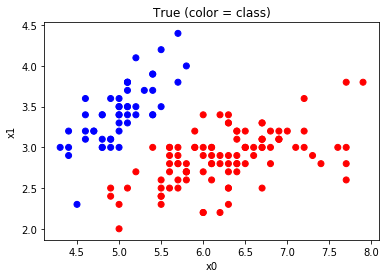

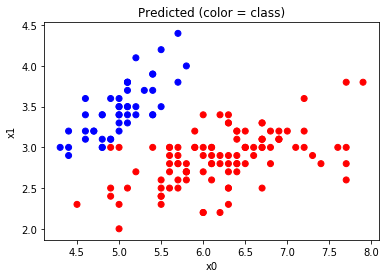

In [9]:
predictions = predict(X)
errors = np.abs(y - predictions)
print(f'Made {np.count_nonzero(errors)} errors on {y.size} datapoints. ({ITERATIONS} iterations)')

plot_data(X, y, title='True (color = class)', xlabel='x0', ylabel='x1')
plot_data(X, predictions, title='Predicted (color = class)', xlabel='x0', ylabel='x1')